In [58]:
# loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# loading the data
df_movie = pd.read_csv("data/movies_metadata.csv")
df_ratings = pd.read_csv("data/ratings_small.csv")
pd.set_option('display.max_columns', None)
df_movie.head()
df_movie['movieId'] = pd.to_numeric(df_movie['id'], errors='coerce')
df = pd.merge(df_ratings, df_movie, on='movieId', how='inner')


/var/folders/5_/39stv43d5_70psn53dfmjwt00000gn/T/ipykernel_13416/2561102761.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movie = pd.read_csv("data/movies_metadata.csv")


In [60]:
print("Peak of the data")
print(df.head())
print('shape of the data')
print(df.shape)
print('describe the data')
print(df.describe())
print('describe the data')
print(df.dtypes)
print('describe the data')
print(df.isnull().sum())

Peak of the data
   userId  movieId  rating   timestamp  adult  \
0       1     1371     2.5  1260759135  False   
1       4     1371     4.0   949810302  False   
2       7     1371     3.0   851869160  False   
3      19     1371     4.0   855193404  False   
4      21     1371     3.0   853852263  False   

                               belongs_to_collection    budget  \
0  {'id': 1575, 'name': 'Rocky Collection', 'post...  17000000   
1  {'id': 1575, 'name': 'Rocky Collection', 'post...  17000000   
2  {'id': 1575, 'name': 'Rocky Collection', 'post...  17000000   
3  {'id': 1575, 'name': 'Rocky Collection', 'post...  17000000   
4  {'id': 1575, 'name': 'Rocky Collection', 'post...  17000000   

                          genres homepage    id    imdb_id original_language  \
0  [{'id': 18, 'name': 'Drama'}]      NaN  1371  tt0084602                en   
1  [{'id': 18, 'name': 'Drama'}]      NaN  1371  tt0084602                en   
2  [{'id': 18, 'name': 'Drama'}]      NaN  1371  tt

### Histogram for numerical graphs

array([[<AxesSubplot:title={'center':'userId'}>,
        <AxesSubplot:title={'center':'movieId'}>,
        <AxesSubplot:title={'center':'rating'}>],
       [<AxesSubplot:title={'center':'timestamp'}>,
        <AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'vote_count'}>, <AxesSubplot:>]],
      dtype=object)

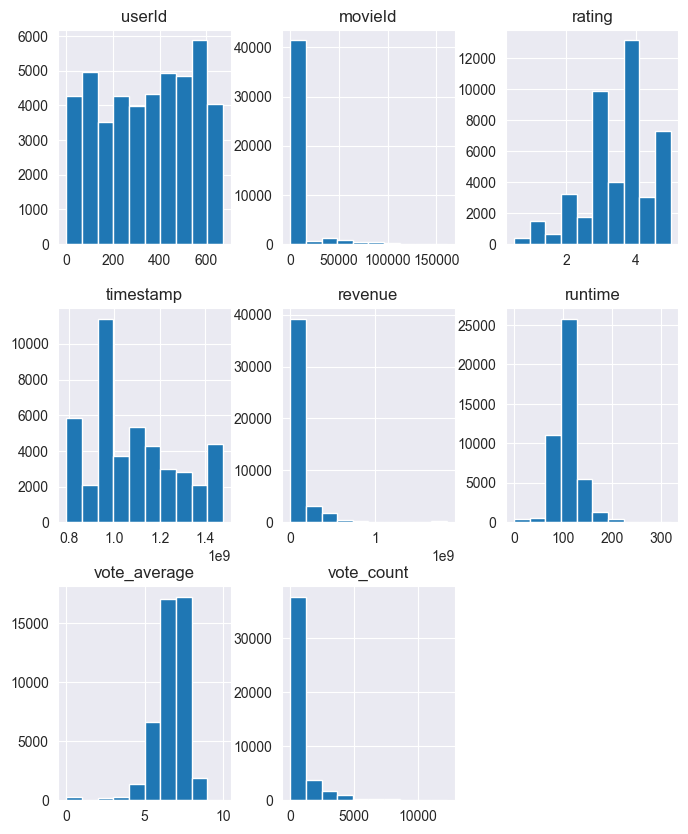

In [61]:
df.hist(figsize=(8, 10))

### Correlation Matrix

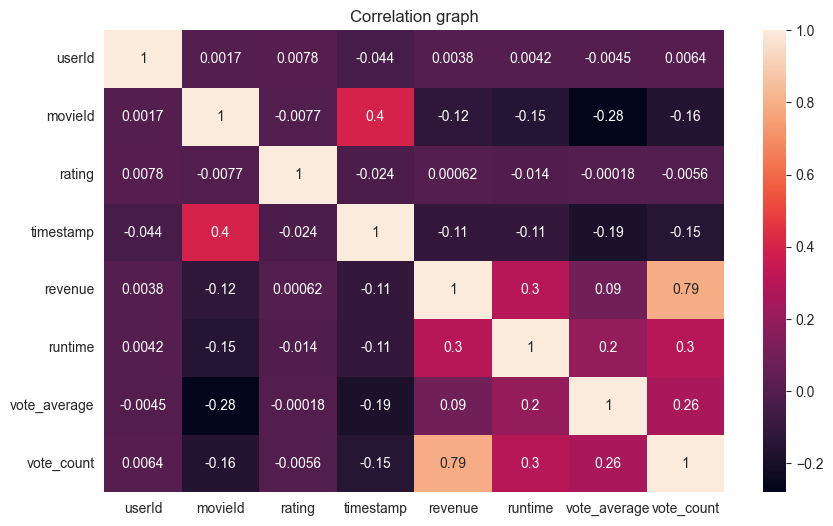

In [62]:
# check the correlation between variables
corr = df.corr()
plt.figure(figsize=(10,6))

sns.heatmap(corr, annot=True)
plt.title('Correlation graph')
plt.show()


### Popular movies

In [63]:
# check the most popular movies
popular_movies = df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print(popular_movies)

title
The Celebration                     5.0
The Wizard                          5.0
Mr. Magorium's Wonder Emporium      5.0
Frank Herbert's Dune                5.0
The Game                            5.0
The Garden of the Finzi-Continis    5.0
Duel of Hearts                      5.0
The General                         5.0
Singin' in the Rain                 5.0
The Brothers Grimm                  5.0
Name: rating, dtype: float64


### Number of Movies v.s. Year

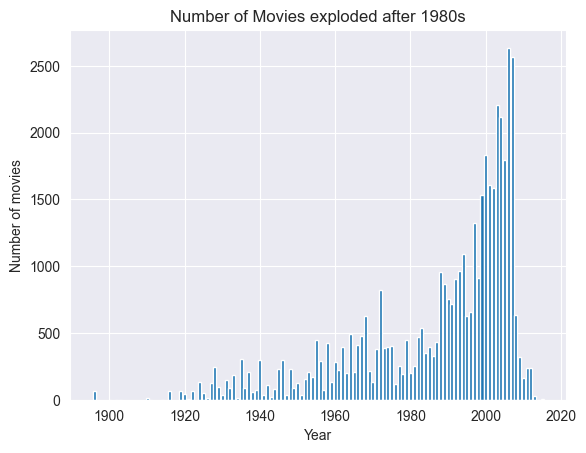

In [64]:
df['year'] = pd.to_datetime(df['release_date']).dt.year
movies_per_year = df.groupby('year')['title'].count()
plt.bar(movies_per_year.index, movies_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Number of Movies exploded after 1980s')
plt.show()

### All movies are released and not adult

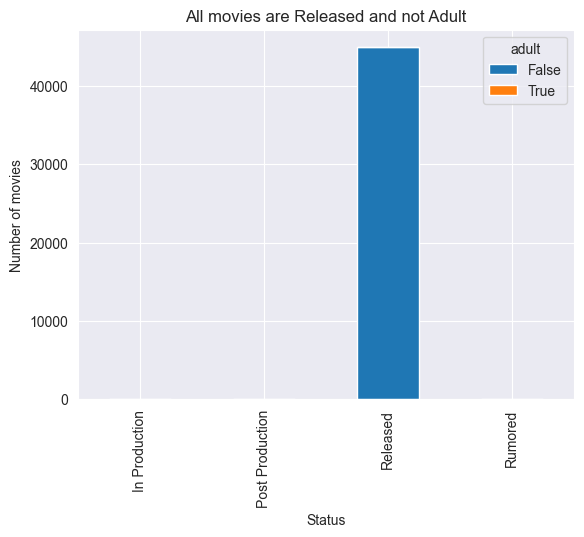

In [65]:
status_adult_counts = df.groupby(['status', 'adult'])['title'].count().unstack()
status_adult_counts.plot(kind='bar', stacked=True)
plt.xlabel('Status')
plt.ylabel('Number of movies')
plt.title('All movies are Released and not Adult')
plt.show()

### Popular words

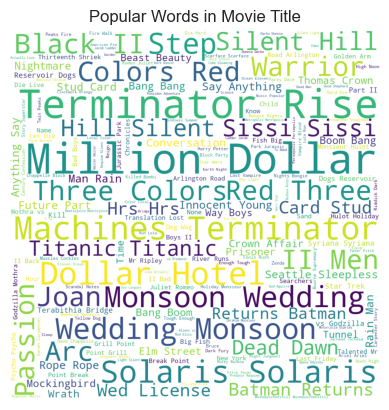

In [66]:
from wordcloud import WordCloud

title_text = ' '.join(df['title'].astype(str).tolist())
wordcloud = WordCloud(width=1000, height=1000, background_color='white').generate(title_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular Words in Movie Title')

plt.show()

### Rating Density Plot

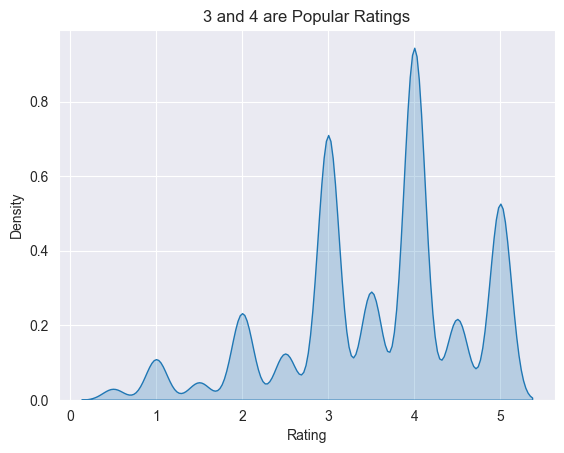

In [67]:
sns.kdeplot(df['rating'], shade=True)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('3 and 4 are Popular Ratings')
plt.show()

### Popular Languages

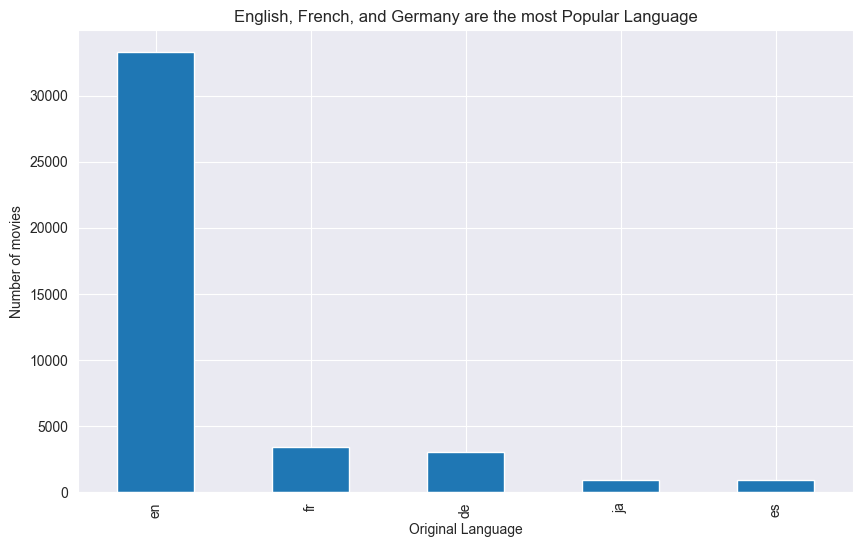

In [68]:
plt.figure(figsize=(10,6))
df['original_language'].value_counts().head().plot(kind='bar')
plt.xlabel('Original Language')
plt.ylabel('Number of movies')
plt.title('English, French, and Germany are the most Popular Language')

plt.show()

### Revenue vs. Rating

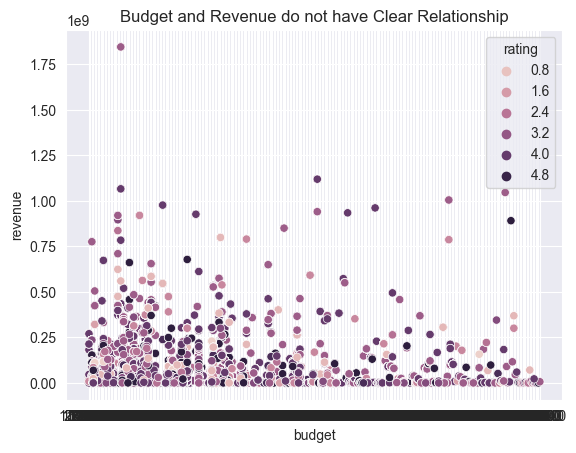

In [69]:
plt.title('Budget and Revenue do not have Clear Relationship')

sns.scatterplot(x='budget', y='revenue', hue='rating', data=df)
plt.show()